In [1]:
# This cell is to import needed libraries/packages and datasets. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Datasets have been cleaned in previous notebooks.

#df_whole is a copy of the original Data frame, with large amounts of cleaning and parsing to allow for plotting.
df_whole = pd.read_csv("df_whole.csv")
#df_lang is a dataframe modified from df_whole, the answer to the languages used question have been exploaded out to get counts per mention.
df_lang = pd.read_csv("df_lang.csv")
#df_whole_45 is a subset of the original data frame that only includes the top 45 countries by participation.
df_whole_45 = pd.read_csv('df_whole_45.csv')
#df_45 is a new data frame created from df_whole_45 that has means, medians and participation counts for categories grouped by country.
df_45 = pd.read_csv("df_45_clean.csv")
#df_salary_test is a copy of df_whole_45
df_salary_test = pd.read_csv('df_salary_test.csv')

# df_whole_45_salary is a version of df_whole_45 that has salary outliers, NAN and zeros removed. It is significantly smaller.
df_whole_45_salary = pd.read_csv('df_whole_45_salary.csv')


#df is the original df.
df = pd.read_csv('data/survey_results_public.csv')

In [2]:
df_whole_45_salary.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

(31624, 83)

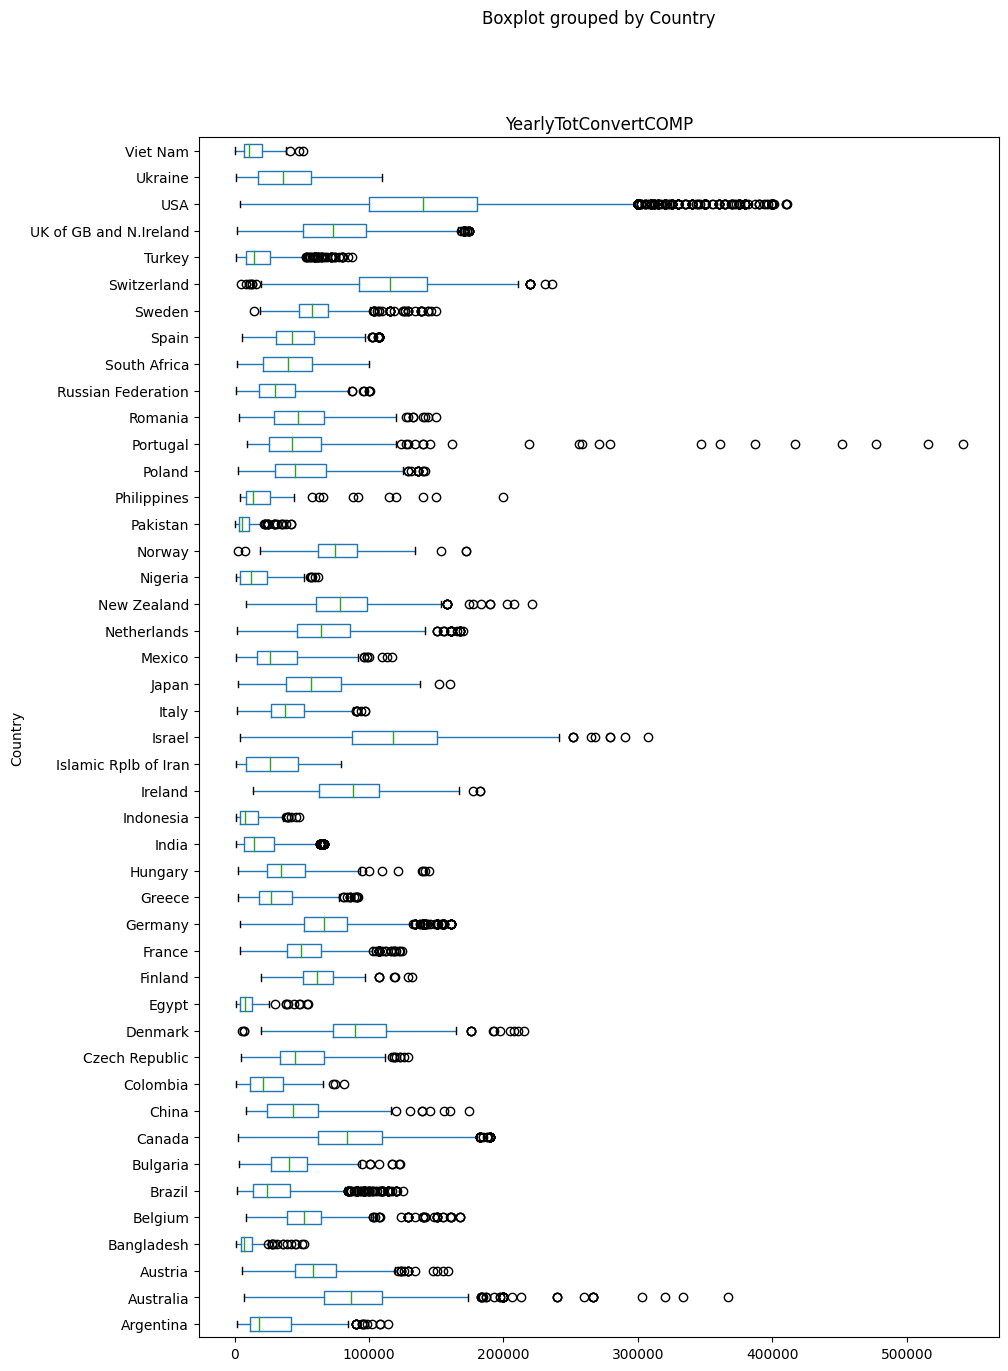

In [3]:
medians = df_whole_45_salary.groupby('Country')['YearlyTotConvertCOMP'].median()
sorted_countries = medians.sort_values(ascending=False)




# Create a new DataFrame sorted by the median values
df_whole_45_salary_sorted= df_whole_45_salary.groupby('Country')['YearlyTotConvertCOMP'].median().sort_values()

df_whole_45_salary.boxplot(by ='Country', column =['YearlyTotConvertCOMP'], grid = False, vert=False,figsize=(10, 16))
df_whole_45_salary.shape

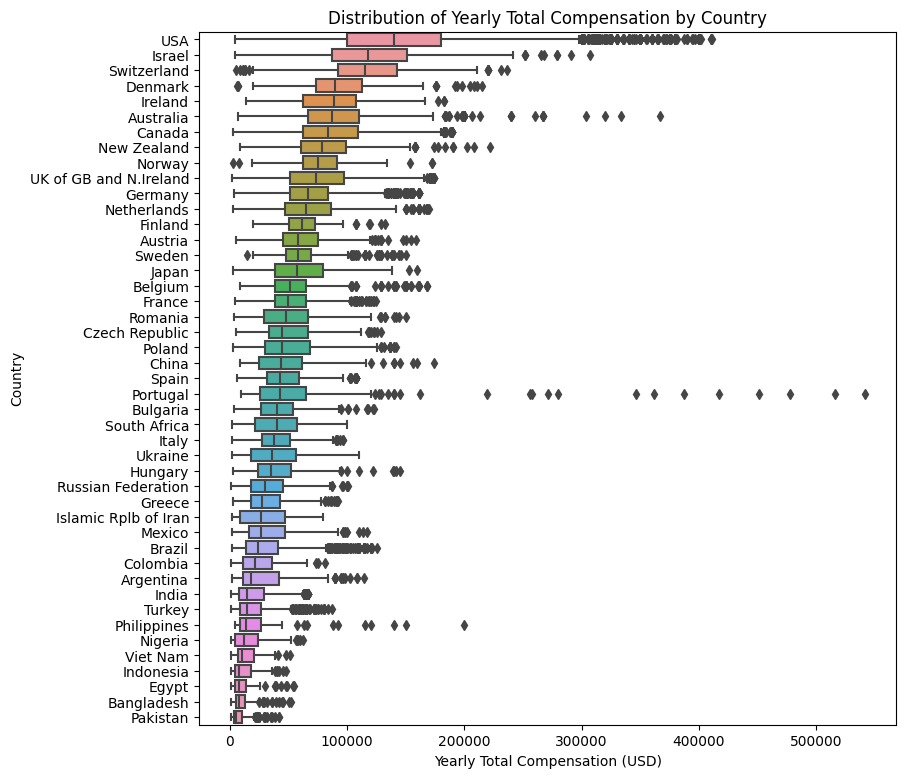

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

medians = df_whole_45_salary.groupby('Country')['YearlyTotConvertCOMP'].median()
sorted_countries = medians.sort_values(ascending=False).index

df2 = df_whole_45_salary[df_whole_45_salary['Country'].isin(sorted_countries)]

plt.figure(figsize=(9, 9))
sns.boxplot(data=df2, x='YearlyTotConvertCOMP', y='Country', order=sorted_countries)
plt.xlabel('Yearly Total Compensation (USD)')
plt.ylabel('Country')
plt.title('Distribution of Yearly Total Compensation by Country')
plt.show()